# Supervised machine learning

## Machine learning <a class="anchor" id="ML"></a>

![featureextraction_p.svg](kuvat/featureextraction_p.svg)

 * The purpose of the supervised machine learning is the teach an algorithm to repeat the work done by a reference method
 * This is usefull if the reference method is more expensive, slower or it has other problems
 * Often the reference method is a human observer, and it can be replaced with an algorithm

## The target of supervised machine learning
Task is to find a function $f$, which predicts variable $y_i$ based on $p$ features $x_{i,j}$, where $i \in [0,N]$ and $j \in [0,P]$.

$$
   \begin{bmatrix}
   y_1 \\
   y_2 \\
   \vdots \\
   y_n
   \end{bmatrix}
   = f 
   \left( \begin{bmatrix}
     x_{11} & x_{12} & x_{13} & \dots  & x_{1p} \\
     x_{21} & x_{22} & x_{23} & \dots  & x_{2p} \\
     \vdots & \vdots & \vdots & \ddots & \vdots \\
     x_{n1} & x_{n2} & x_{n3} & \dots  & x_{np}
   \end{bmatrix} \right)
$$



## Training, Validation and Testing <a class="anchor" id="TrainTestValidate"></a>

Building predictive models requires following stages
1. Model building (training)
1. Model validation (often within an interation/optimisation loop)
1. Model testing (in the end)

Important rules related to model building and testing
1. The model cannot be tested using training set, because that would lead to overfitting
1. Test set may not bet used many times, because then you would overfit to the test data

Each stage requires data. The original data can be split in three different sets, one for each stage, but high quality labeled data is usually scarce resource, and in that cases slightly smarter method of using the data is needed.

### Cross Validation <a class="anchor" id="crossvalidation"></a>

![crossvalidation.svg](kuvat/crossvalidation.png "Crossvalidation")

 - Cross validation is an important technique to utilize the data more efficiently for all supervised training purposes
 - With cross validation, the training set is divided in N-folds.
 - At first (N-1) folds are used for training and 1 fold for validation
 - The process is repeated N times, until every sample has participated in training and validation sets
 - The final score is the average of all N scores

## Distance metrics <a class="anchor" id="distance"></a>

 - Clustering, classification and regression assume that samples near each other, at close proximity, are more similar with each other than those which are farther away. 

But what do we mean by distance?

There are many distance metrics:
 - Euclidean distance $r_{1,2}=\sqrt{(x_1 -x_2)^2 + (y_1 - y_2)^2 + (z_1 -z_2)^2}$
 - Manhattan distance $r_{1,2}=|x_1-x_2| + |y_1-y_2| + |z_1-z_2|$
 - [Mahalanobis distance](https://www.statisticshowto.datasciencecentral.com/mahalanobis-distance/) 
   $r_{1,2}= \sqrt{(p_1 – p_2)^T \; C^{-1} \; (p_1 – p_2)}$, where $C$ is the covariance matrix.
   

In [1]:
# Import standard stuff, plus material from Scikit Learn

import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

Text(0,0.5,'Feature 2')

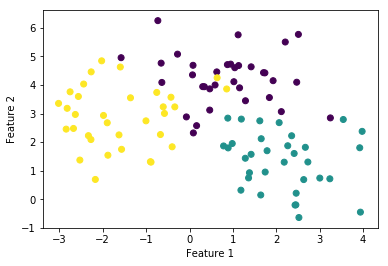

In [2]:
# Create a synthetic data set and plot it
X,y=datasets.make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

## Scaling
What if the scaling is different?

Text(0,0.5,'Feature 2')

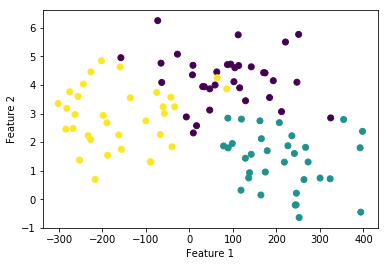

In [3]:
# Create a synthetic data set and plot it
X,y=datasets.make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)
X2= X*[100,1]
y2=y
plt.scatter(X2[:,0], X2[:,1], c=y2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

The problem is that the distances are dominated by feature1 and feature 2 is not significant, even though intuitively it seems to be very important for classification.

### Then scale it first
To elimninate the distortion due to scaling, normalise the varibles first. Usullay they are normalized so that the means and standard deviations are are the same. Usually $\bar{x}=0$¸ and $\sigma_x =1$.

 $$x=\frac{x-\bar{x}}{\sigma_x}$$,
 where $\bar{x}$ is the mean value of x.
 
 Scikit Learn includes StandardScaler() object for standardisation of features:
 


Text(0,0.5,'Feature 2')

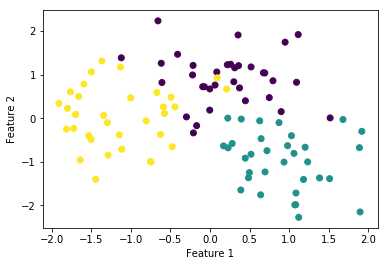

In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X2)
X2s=scaler.transform(X2)
plt.scatter(X2s[:,0], X2s[:,1], c=y2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Now both features have equal weights.

But beware outliers when scaling features. Only one outlier can spoil your scaling! There are also robust scalers.

## Categorial features?
 - Features can be 
   - Real values, like floating points or integers, which can be ordered
   - Categorical features, which is an unordered set of identifiers for separate classes
   - Because you cannot order the categorical features, they do not have distance metrics either
   - Many methods rely on distances, and simply using numbers as categories only makes the operation of the predictor worse
   - Some methods, like Naive Bayesian Classifier (NBC) can use directly categorical features
   - For many others, it is best to use ns [One Hot Encoding]((https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), where one binary feature is used to represent each category. Therefore a feature with N-categories will be replaced by a N-bit binary vector. 
   
### Example:
Assume that the species of the Iris is in fact a categorical feature for some ML algorithm. If you would code them just simply like 'setosa' -> 1, 'versicolor' ->2 and 'virginica' -> 3, the ML algorithm could think it as a numerical feature, and use it to calculate distances between species :( 

The fix is to use so called One Hot Encoding.
Here is the original data:

In [5]:
from sklearn import datasets
import pandas as pd
import numpy as np

iris_dataset=datasets.load_iris()
iris=pd.DataFrame(iris_dataset.data)
iris.columns=iris_dataset.feature_names
iris['species']=[iris_dataset.target_names[i] for i in iris_dataset.target]
iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### One hot encoding  <a class="anchor" id="OneHotEncoding"></a>
Now we can encode the species to number in a safe way:

1. Make an encoder and transform the target variable to OneHot format
1. The categorial variable can be currently encoded as integers, strings or any objects OneHotEncoder reads it in the for nxp matrix, where n is number of samples and p is the number of features to be encoded. 
1. Originally target was such kind of numpy array, which do not have the second index at all. It has to be (unfortunately) converted to column vector, which is otherwise the same, but it has also the second axis, which has only one value, a nx1 array. 
1. This can be done by just simply adding a new dimension into the array, using np.newaxis constant or by using reshape function. 
 


In [6]:
from sklearn.preprocessing import OneHotEncoder

# Change to One hot encoding

# Add a new column for each species
for name in iris_dataset.target_names:
    iris[name]=0
    

# The result of the One hot encoding is a sparse matrix, which can be converted to numpy 
# array using toarray method:
enc=OneHotEncoder(categories='auto')
iris.loc[:,'setosa':'virginica']=enc.fit_transform(iris_dataset.target[:,np.newaxis]).toarray()
#iris.loc[:,'setosa':'virginica']=enc.fit_transform(iris_dataset.target.reshape(150,1)).toarray()
iris.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,setosa,versicolor,virginica
78,6.0,2.9,4.5,1.5,versicolor,0.0,1.0,0.0
95,5.7,3.0,4.2,1.2,versicolor,0.0,1.0,0.0
123,6.3,2.7,4.9,1.8,virginica,0.0,0.0,1.0
90,5.5,2.6,4.4,1.2,versicolor,0.0,1.0,0.0
7,5.0,3.4,1.5,0.2,setosa,1.0,0.0,0.0
37,4.9,3.6,1.4,0.1,setosa,1.0,0.0,0.0
131,7.9,3.8,6.4,2.0,virginica,0.0,0.0,1.0
64,5.6,2.9,3.6,1.3,versicolor,0.0,1.0,0.0
62,6.0,2.2,4.0,1.0,versicolor,0.0,1.0,0.0
115,6.4,3.2,5.3,2.3,virginica,0.0,0.0,1.0


## Nearest Neighbours methods <a class="anchor" id="nearestneighbours"></a>

Nearest Neighbour methods provide some very staightforward methods for supervised machine learning

### Brute force implementation

 1. Set the number of nearest neighbours, $K$
 1. To predict one new sample, calculate its distance to all known training samples
 1. Order the list of distances
 1. Select $K$ nearest samples and use them for prediction
    - In case of classification, the result is the mode of the K-nearest set
    - In case of regression, the result is for example the average of the K-nearest set


- The asymptotic execution time of the brute for implementation is $\mathcal{O}[D N^2]$ which makes it unsuitable for large data sets and high dimesional problems
- To extend NN method, the neighbourhood information can be encoded in a tree structure to reduce the number of distances which need to be calculated. For example a KD-Tree implementation can be calculated in $\mathcal{O}[D N \log ({N})]$ time.
- The Ball-Tree implementation makes algorith even more suitable in high-dimensional problems 

In [7]:
from sklearn import neighbors
n_neighbors = 5
knn=neighbors.KNeighborsClassifier(n_neighbors)
knn.fit(X,y)
knn.predict(X)


array([1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0,
       0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1,
       0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2])

In [8]:
import sklearn.metrics as metrics
print(metrics.confusion_matrix(y_true=y, y_pred=knn.predict(X), labels=None, sample_weight=None))
print("The accuracy of KNN in the original data is..... %4.2f" % metrics.accuracy_score(y_true=y, y_pred=knn.predict(X)))


knn2=neighbors.KNeighborsClassifier(n_neighbors)
knn2.fit(X2s,y)
print("The accuracy of KNN in the scaled data is....... %4.2f" %metrics.accuracy_score(y_true=y, y_pred=knn2.predict(X2s)))


knn3=neighbors.KNeighborsClassifier(n_neighbors)
knn3.fit(X2,y)
print("The accuracy of KNN for badly scaled data is.... %4.2f" %metrics.accuracy_score(y_true=y, y_pred=knn3.predict(X2)))

[[31  2  1]
 [ 0 33  0]
 [ 2  0 31]]
The accuracy of KNN in the original data is..... 0.95
The accuracy of KNN in the scaled data is....... 0.96
The accuracy of KNN for badly scaled data is.... 0.75


### Pipelining 
In Scikit Learn, all methods are build using the same interface. This makes it easier to build larger machine learning systems by combining different stages together as pipelines. 

For example, the scaling of features, dimensionality reduction, and sclassification can be combined as a single pipeline. This is especially usefull, when several datasets (validation data, testing data, production data, etc) needs to be fed through the same stages.

In [9]:
from sklearn.pipeline import Pipeline
n_neighbors=9
pipeline=Pipeline([
        ('Scaling', StandardScaler()),
        ('KNN', neighbors.KNeighborsClassifier(n_neighbors))
    ])
pipeline.fit(X2,y)
predictedY=pipeline.predict(X2)

print(metrics.confusion_matrix(y_true=y, y_pred=predictedY))
print(metrics.accuracy_score(y_true=y, y_pred=predictedY))


[[29  3  2]
 [ 1 32  0]
 [ 2  0 31]]
0.92


## Visualization of the decision boundaries

In [10]:
from matplotlib.colors import ListedColormap
def plotDB(predictor, X, y, steps=100):
    """Plots the Decision Boundary
        pipe = classification pipeline
        X is the training data used for training the classifier
        steps = number of x and y steps in calculating the boundary
    """
    # Create color map
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    hx = (x_max - x_min)/steps
    hy = (y_max - y_min)/steps
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx),
                         np.arange(y_min, y_max, hy))
    Z = predictor.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision boundary")
    
# Display the support vectors of support vector machine
def DisplaySupportVectors(X,y,svc):
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    colors="rgb"
    for i in svc.support_:
        a,b=X[i]
        c=y[i]
        plt.plot(a,b, '%sx' % (colors[c]), ms=8)


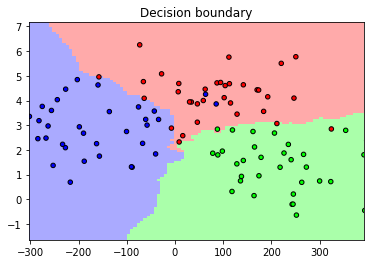

In [11]:
plotDB(pipeline, X2, y2)

### Variations
 - Nearest Centroid classifier
   - The training data is replaced with a centroid of each class
 - Neigborhood Component Analysis (NCA)
   - The coordinate axis are changed so that the separation between the classes is maximized
   - This supervised dimensionality reduction method can be used for exploring the data
   - It can also improve the performance of NN classifiers or regressors

## Nearest Centroid Classifier
Nearest centroid classifier does not need to store all training data, thats why it is also faster to predict.

0.91


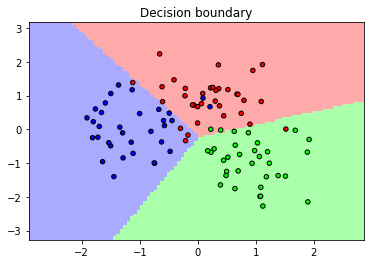

In [12]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
pipelineCentroid=Pipeline([
        ('Scaling', StandardScaler()),
        ('KNN', NearestCentroid())
    ])
pipelineCentroid.fit(X2s,y2)
predictedY=pipelineCentroid.predict(X2s)
print(metrics.accuracy_score(y_true=y2, y_pred=predictedY))
plotDB(pipelineCentroid, X2s, y2)

## Support Vector Machine (SVM) <a class="anchor" id="supportvectormachine"></a>
 - SVM is kind of Jack of All Trades for classifiers
 - It does not save all training samples like NearestNeigbour method, but only the samples near the border of class boundaries.
 - These boundary samples are called as support vectors.
 - SVM works for high dimensional data and large sample sizes
 - Can be used for both classification and regression
 - Can be extended to nonlinear decision boundaries using kernels

### Decision boundary
 - SVM uses samples near the different clusters to define a decision boundary
 - The boundary which maximises the marginal of the boundary will be selected
 - THe support vectors definind the boundary will be stored

In [13]:
from sklearn.model_selection import train_test_split

# Lets create a two-dimensional dataset containing two cluster centers
X,y=datasets.make_blobs(n_samples=200, centers=2, n_features=2, random_state=0, cluster_std=0.6)

# Now the dataset will be splitted randomly to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

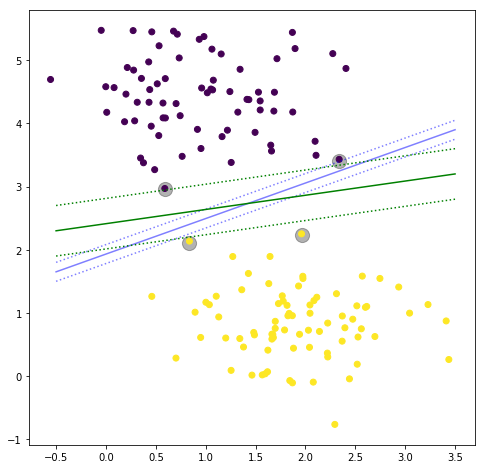

In [14]:
# Lets plot the data and optimal decision boundary with support vectors
a=plt.figure(figsize=(8,8))

plt.scatter([0.5965, 2.33479, 0.83645, 1.97], [2.9567, 3.4118, 2.11336, 2.23518],  s=200, c='k', alpha=0.3)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
ax=plt.gca()

# Plot decision boundaries
m=0.15; plt.plot([-0.5,3.5], [1.65,   3.9], 'b', alpha=0.5); plt.plot([-0.5,3.5], [1.65+m, 3.9+m], 'b:', alpha=0.5); plt.plot([-0.5,3.5], [1.65-m, 3.9-m], 'b:', alpha=0.5)
m=0.4; plt.plot([-0.5,3.5], [2.3, 3.2], 'g'); plt.plot([-0.5,3.5], [2.3+m, 3.2+m], 'g:'); plt.plot([-0.5,3.5], [2.3-m, 3.2-m], 'g:')

Accurary in the trainint set..1.000000
Accurary in the test set......1.000000
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


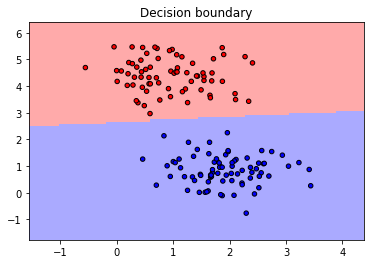

In [15]:
# Lets now try how actual linear SCV would work
from sklearn import svm
linsvc = svm.SVC(kernel='linear')
linsvc.fit(X_train, y_train)
plotDB(linsvc, X_train, y_train)

print("Accurary in the trainint set..%f" % metrics.accuracy_score(y_true=y_train, y_pred=linsvc.predict(X_train)))
print("Accurary in the test set......%f" % metrics.accuracy_score(y_true=y_test, y_pred=linsvc.predict(X_test)))
print(linsvc)

In [16]:
# Lets try slightly more complex case

# Lets create a two-dimensional dataset containing three cluster centers
X,y=datasets.make_blobs(n_samples=200, centers=3, n_features=2, random_state=0, cluster_std=1.1)

# Now the dataset will be splitted randomly to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

Accurary in the training set..0.940000
Accurary in the test set......0.920000
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


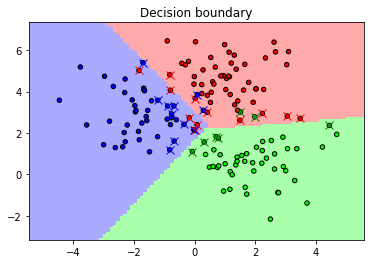

In [17]:
# Lets now try how actual linear SCV would work
from sklearn import svm
linsvc = svm.SVC(kernel='linear')
linsvc.fit(X_train, y_train)
plotDB(linsvc, X_train, y_train)

print("Accurary in the training set..%f" % metrics.accuracy_score(y_true=y_train, y_pred=linsvc.predict(X_train)))
print("Accurary in the test set......%f" % metrics.accuracy_score(y_true=y_test, y_pred=linsvc.predict(X_test)))
print(linsvc)

DisplaySupportVectors(X_train, y_train, linsvc)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accurary in the trainint set..0.940000
Accurary in the test set......0.920000
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


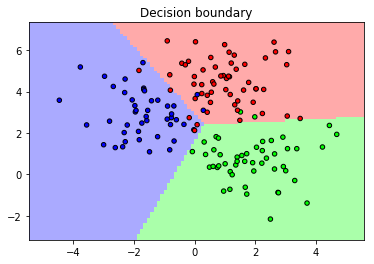

In [18]:
# Lets now try how actual linear SCV would work
Linsvc = svm.LinearSVC()
Linsvc.fit(X_train, y_train)
plotDB(Linsvc, X_train, y_train)

print("Accurary in the trainint set..%f" % metrics.accuracy_score(y_true=y_train, y_pred=Linsvc.predict(X_train)))
print("Accurary in the test set......%f" % metrics.accuracy_score(y_true=y_test, y_pred=Linsvc.predict(X_test)))
print(Linsvc)

## Kernel SVM <a class="anchor" id="kernelsvm"></a>

Linear kernel 

Accurary in the training set..0.940000
Accurary in the test set......0.900000
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


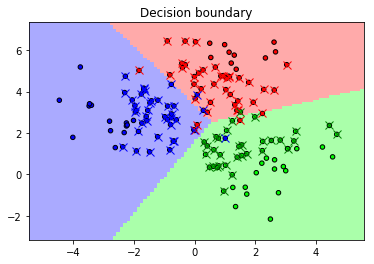

In [67]:
# Lets now try how actual linear SCV would work
rbfsvc = svm.SVC(kernel='rbf', gamma=0.01, C=0.5)  # gamma > 2 means overfitting, try eg 25 and 0.05
rbfsvc.fit(X_train, y_train)
plotDB(rbfsvc, X_train, y_train)

print("Accurary in the training set..%f" % metrics.accuracy_score(y_true=y_train, y_pred=rbfsvc.predict(X_train)))
print("Accurary in the test set......%f" % metrics.accuracy_score(y_true=y_test, y_pred=rbfsvc.predict(X_test)))
print(rbfsvc)
DisplaySupportVectors(X_train, y_train, rbfsvc)

In [20]:
# Lets test the model with CV in higher nimensions

# Lets create a two-dimensional dataset containing three cluster centers
#X,y=datasets.make_blobs(n_samples=200, centers=5, n_features=3, random_state=0, cluster_std=2)
X,y=datasets.make_blobs(n_samples=200, centers=3, n_features=2, random_state=0, cluster_std=1.1)

# Now the dataset will be splitted randomly to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

from sklearn.model_selection import cross_val_score
rbfsvc = svm.SVC(kernel='rbf', gamma=1, C=0.5)  # gamma > 2 means overfitting
scores = cross_val_score(rbfsvc, X_train, y_train, cv=5)
print("Mean CV score is %4.2f, all scores=" % (scores.mean()), scores)

# CV can be put into loop to find optimal gamma value
gamma=np.logspace(-2,1.2,40)
test_score=np.zeros(len(gamma))
train_score=np.zeros(len(gamma))
cv_score=np.zeros(len(gamma))
for i in range(len(gamma)):
    rbfsvc = svm.SVC(kernel='rbf', gamma=gamma[i], C=0.5)
    rbfsvc.fit(X_train, y_train)
    train_score[i]=metrics.accuracy_score(y_train, rbfsvc.predict(X_train))
    test_score[i]=metrics.accuracy_score(y_test, rbfsvc.predict(X_test))
    cv_score[i] = cross_val_score(rbfsvc, X_train, y_train, cv=5).mean()
    

Mean CV score is 0.88, all scores= [0.83870968 0.96774194 0.83333333 0.86666667 0.89285714]


Best gamma value is 0.066147
Accurary in the test set......0.980000


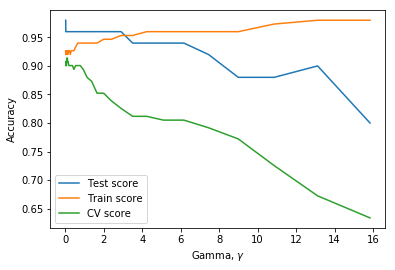

In [21]:
plt.plot(gamma, test_score, label="Test score")
plt.plot(gamma, train_score, label="Train score")
plt.plot(gamma, cv_score, label="CV score")
best_gamma=gamma[cv_score.argmax()]
print("Best gamma value is %f" % best_gamma)
rbfsvcbest = svm.SVC(kernel='rbf', gamma=best_gamma, C=0.5).fit(X_test, y_test)
plt.legend()
plt.xlabel('Gamma, $\gamma$')
plt.ylabel('Accuracy')
print("Accurary in the test set......%f" % metrics.accuracy_score(y_true=y_test, y_pred=rbfsvcbest.predict(X_test)))

## Non-linear classes
 - If the data described by $p_i=[x_i, y_i]^T$ is not linearly separable, it can be made linearly separable by adding a new term, for example $z_i=x_i^2 + y_i^2$
 - In this case, third dimension is introduced, and the linear classifier can work in the new three dimensional space $ p_i'=[x_i, y_i, z_i]^T $ 
 - SVM uses this kernel trick to separate non-linear cases
 - The kernel functions include the dot product of two points in a suitable feature space. Thus defining a notion of similarity, with little computational cost even in very high-dimensional spaces.
 - There are many kernel options, most common being
   - Polynomial kernel $k(p_i, p_j) = (p_i \cdot p_j +1)^d$
   - Gaussian  kernel or Gaussian Radial Basis Function (RBF), shown below
   
   $$k(p_i, p_j) = \exp \left( - \frac{\Vert p_i-p_j \Vert^2}{2 \sigma^2} \right)
   \qquad 
   k(p_i, p_j) = \exp ( - \gamma \Vert p_i-p_j \Vert^2) $$
   
### Illustration of RBF
- The following code plots the RBF when $p_i$ is in origo and $p_j$ moves along x-axis. 
- In real case the RBF is N-dimensional, centered around a sample $p_i$

Text(0,0.5,'$k([0,0,0]^T, [x,0,0]^T)$')

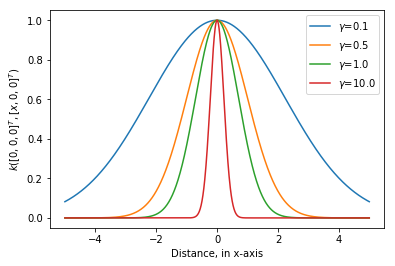

In [22]:
# Plot the radial basis functions (RBF) with different gamma values
xc=np.linspace(-5,5,1000)
for gamma in [0.1, 0.5, 1.0, 10.0, ]:
    r=np.exp(-gamma*xc**2)
    plt.plot(xc,r,label='$\gamma$=%3.1f' % (gamma))
plt.legend()
plt.xlabel('Distance, in x-axis')
plt.ylabel('$k([0,0,0]^T, [x,0,0]^T)$')


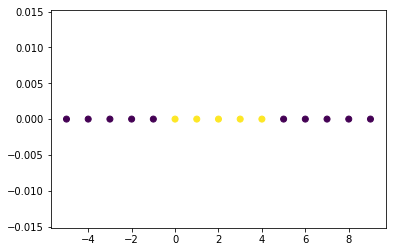

In [43]:
# Test with some example data.
# How to separate two classes with linear decision function
# This is one dimensional case, since the second dimension is dummy (only zeros)
x1=np.arange(-5,10)
x2=np.zeros(len(x1))
ytest=np.zeros(len(x1))
ytest[5:10]=1
plt.scatter(x1,x2,c=ytest)


**Solution:** Use the 8th value as a support vector, and use RBF kernel to increase one more dimesion

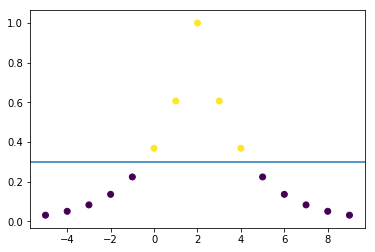

In [60]:
# Import norm, which calculates || p1- p2 ||^2
from scipy.linalg import norm

# Define the RBF function
def rbf(p1, p2, gamma):
    return np.exp(-gamma*norm(p1-p2))

# Calculate the kernel value for all data points
for i in range(len(x1)):
    x2[i]=rbf(x1[7], x1[i], 0.5)
    
plt.scatter(x1,x2,c=ytest)

# Mark almost optimal decision boundary as horizontal line
plt.axhline(0.3) 

Now the classes are separable, but what is the optimal Gamma value?

### Testing RBF in circular data 

Accurary in the training set..1.000000
Accurary in the test set......1.000000
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


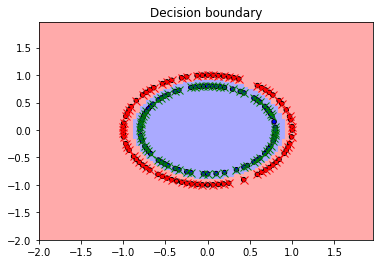

In [23]:
Xc,yc=datasets.make_circles(n_samples=200)
X_train, X_test, y_train, y_test = train_test_split(Xc,yc, test_size=0.25)

rbfsvc = svm.SVC(kernel='rbf', gamma='scale')
rbfsvc.fit(X_train, y_train)

print("Accurary in the training set..%f" % metrics.accuracy_score(y_true=y_train, y_pred=rbfsvc.predict(X_train)))
print("Accurary in the test set......%f" % metrics.accuracy_score(y_true=y_test, y_pred=rbfsvc.predict(X_test)))
print(rbfsvc)
plotDB(rbfsvc, X_train, y_train)
DisplaySupportVectors(X_train, y_train, rbfsvc)

Accurary in the training set..1.000000
Accurary in the test set......1.000000
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


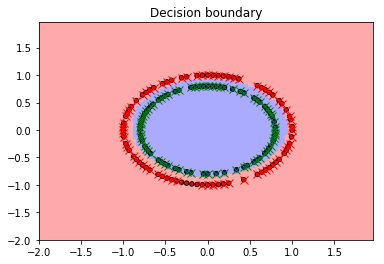

In [24]:
rbfsvc = svm.SVC(kernel='rbf', gamma=0.5)
rbfsvc.fit(X_train, y_train)

print("Accurary in the training set..%f" % metrics.accuracy_score(y_true=y_train, y_pred=rbfsvc.predict(X_train)))
print("Accurary in the test set......%f" % metrics.accuracy_score(y_true=y_test, y_pred=rbfsvc.predict(X_test)))
print(rbfsvc)
plotDB(rbfsvc, X_train, y_train)
DisplaySupportVectors(X_train, y_train, rbfsvc)

Read more from [Understanding SVM](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)


## Decision trees and forests <a class="anchor" id="dtaforests"></a>

### Decision tree <a class="anchor" id="decisiontrees"></a>

In [25]:
from sklearn import tree

X,y=datasets.make_blobs(n_samples=200, centers=3, n_features=2, random_state=0, cluster_std=1.1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)


print("Accurary in the training set..%f" % metrics.accuracy_score(y_true=y_train, y_pred=dt.predict(X_train)))
print("Accurary in the test set......%f" % metrics.accuracy_score(y_true=y_test, y_pred=dt.predict(X_test)))
print(dt)
tree.export_graphviz(dt, 'dt.dot', filled=True, rounded=True)

Accurary in the training set..0.913333
Accurary in the test set......0.980000
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


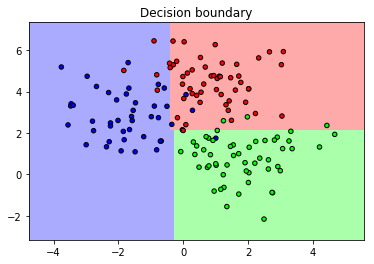

In [26]:
plotDB(dt, X_train, y_train)

### Optimize the tree depth

Best depth value is 2.000000
Accurary in the test set......0.880462


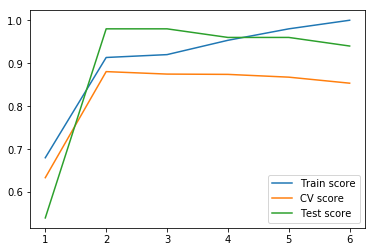

In [27]:
N=6
train_score=np.zeros(N)
test_score=np.zeros(N)
cv_score=np.zeros(N)
depth=np.arange(N)+1
for i in range(N):
    dt = tree.DecisionTreeClassifier(max_depth=depth[i])
    dt.fit(X_train, y_train)
    train_score[i]=metrics.accuracy_score(y_train, dt.predict(X_train))
    test_score[i]=metrics.accuracy_score(y_test, dt.predict(X_test))
    cv_score[i] = cross_val_score(dt, X_train, y_train, cv=5).mean()
plt.plot(depth, train_score, label="Train score")
plt.plot(depth, cv_score, label="CV score")
plt.plot(depth, test_score, label="Test score")
best_depth=depth[cv_score.argmax()]
print("Best depth value is %f" % best_depth)
plt.legend()
print("Accurary in the test set......%f" % cv_score.max())

- It seems that two is the optimal depth of the decision tree, since after that the accuracy of the cross validation is not increased any more. 
- The accuracy in the training set increases up to 100%, untill every point is in its own leaf, but that is only overfitting to the training data
- Test score shows the same message than cross validation
- Therefore do not use test data in optimising the model. Use it only in the end, when you have selected the optimal model using cross validation

Red more from [Skikit Learn](https://scikit-learn.org/stable/modules/tree.html)


## Ensemble methods <a class="anchor" id="ensemblemethods"></a>

- Bagging in [Skikit Learn](https://scikit-learn.org/stable/modules/ensemble.html)
  - A subset of the training data is selected and a full decision trees or other classifier is trained for it
  - The output of all predictors in the bag are then aggregated by voting, averaging or other methods
  - This method reduces the variance in the predictor generation process by introducing some randomness
- Boosting is another method to combine multiple predictors

### Bagging <a class="anchor" id="Bagging"></a>

#### Randomized trees   <a class="anchor" id="RandomizedTrees"></a>
- Forest of randomized trees is one famous bagging method. it works as follows
  1. A random partition of data is drawn from the training data to bootstrap the tree structure
  1. The tree may use all features or only a random subset of available features
  1. The output is again aggregated from all predictors
  1. The two sources of randomness stabilizes the tree structure and reduces overfitting
- Read more from [Skikit Learn](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)

#### Extratrees classifier (Extremely randomized trees)
- Even more random 
- The threshold rules are selected at random for randomly selected features
- The best thresholding rules are voted
- Read more from [Skikit Learn](https://scikit-learn.org/stable/modules/ensemble.html#extremely-randomized-trees)

#### Optimising the parameters fo the Extratrees classifier

- Extratrees classifier has already many more parameters than normal decision tree.
- It is not convenient to try them all to find out an optimal combination
- Hand made optimisation loop with cross validation can be used as shown previously to make exhaustive search
- There is also better method in Scikit Learn, called as `GridSearchCV`
- It uses an optimisation algorithm and CV to find out optimal parameters
- First we just need to define which variables are going to be searched and in which range
- Then we let the optimisation algorith to tune the predictor and we just used the optimal version
- Note that we already got higher accuracy than with using a single tree predictor

In [66]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

X,y=datasets.make_blobs(n_samples=200, centers=3, n_features=2, random_state=0, cluster_std=1.1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

et = ExtraTreesClassifier(max_depth=5, min_samples_split=2, n_estimators=9)
et.fit(X_train, y_train)

# Set the parameters by cross-validation
tuned_parameters = [{'max_depth': range(3,10), 'min_samples_split': range(2,5),
                     'n_estimators': range(5,30)}]

#  Use the GridSearch to find out the best paramers using 5 fold cross validation
tune_et=GridSearchCV(et, tuned_parameters, cv=3);
tune_et.fit(X_train, y_train);
optimal_et=tune_et.best_estimator_

print("Accurary in the training set..%f" % metrics.accuracy_score(y_true=y_train, y_pred=optimal_et.predict(X_train)))
print("Accurary in the test set......%f" % metrics.accuracy_score(y_true=y_test, y_pred=optimal_et.predict(X_test)))
print(optimal_et)

Accurary in the training set..0.933333
Accurary in the test set......0.920000
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=3, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


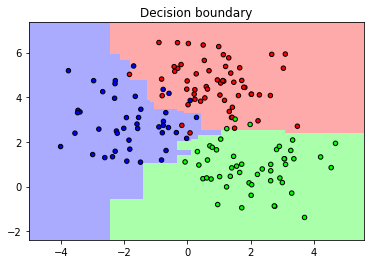

In [29]:
plotDB(optimal_et, X_train, y_train)

## Boosting <a class="anchor" id="Boosting"></a>
  - Construct weak random trees and chain them after each other on modified version of the data
  - Examples [Adaboost](https://scikit-learn.org/stable/modules/ensemble.html#adaboost)
    [Gradient Tree Boosting](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting)
    [XGBoost](https://xgboost.readthedocs.io/en/latest/)

### Adaboost <a class="anchor" id="AdaBoost"></a>
1. First create one weak predictor, which is perhaps only slightly better than guessing
1. Assign equal weight $w_i=1/N$ to each of the N samples
1. Repeat following boosting iteration M times:
  1. Try to predict the data with one weak predictor
  1. Find out which samples were incorrectly classified, and increase their weights, decrease the weights of correctly classified samples
  1. Train the next predictor with the weighted data so that it concentrates especially to those samples which were difficult for the classifiers this far. 
1. The final classification result is voted by the predictors

| First publications|
| -------------------|
| Freund, Y., & Schapire, R. E. (1997). A Decision-Theoretic Generalization of On-Line Learning and an Application to Boosting. Journal of Computer and System Sciences, 55(1), 119–139. https://doi.org/10.1006/jcss.1997.1504 {cite}`freund_decision-theoretic_1997`|
| Drucker, H. (1997). Improving Regressors using Boosting Techniques. ICML. {cite}`drucker_improving_1997`|
|  Hastie, T., Rosset, S., Zhu, J., & Zou, H. (2009). Multi-class AdaBoost. Statistics and Its Interface, 2(3), 349–360. https://doi.org/10.4310/SII.2009.v2.n3.a8 {cite}`hastie_multi-class_2009`
|




### Gradient Tree Boosting <a class="anchor" id="GBRT"></a>
 - Also called as Gradient Boosted Regression Trees (GBRT)
 - Improved version of Adaboost
 - The predictor is an aggregation of many weak individual predictors, often small decision trees, like in Adaboost
 - The main difference is that the boosting in GBRT:s is implemented as an optimisation algorithm
 
 $$Obj(\Theta) = \underbrace{L(\Theta)}_{Training Loss} + \underbrace{\Omega(\Theta)}_{Regularization}$$
 
 

  $$Obj(\Theta) = \underbrace{L(\Theta)}_{Training Loss} + \underbrace{\Omega(\Theta)}_{Regularization}$$

 - The target of the optimisation is to minimize the Objective function
 - The model fitness involves minimization of th training loss and model complexity (Regularization term)
 - Training loss function is often a squared distance $L(\hat{y}_i,y_i) = (\hat{y}_i -y_i)^2$
 - Regularization term is usually either 
   - $L_2$ norm: $\Omega(w)=\lambda \Vert w \Vert ^2$ or 
   - $L_1$ norm: $\Omega(w)=\lambda \vert w \vert$
   
 - Optimizing training loss improves the prediction capability of the model, because it is hoped that the predictor will learn the underlying distributions
 - Optimizing regularization encourages simples modes. They tend to predict better for future data, since simpler methods do not suffer from overfitting as easily as complex models
 - Read more from Interesting [slides about gradient boosting](https://homes.cs.washington.edu/~tqchen/pdf/BoostedTree.pdf)
 
| First publications|
| -------------------|
| Breiman, L. (1997). Arcing the edge. Technical Report 486, Statistics Department, University of California at ….
 {cite}`breiman_arcing_1997`|

### Extreme Gradient Boosting (XGBoost) <a class="anchor" id="XGBoost"></a>
- A library implementing Gradient Tree Boosting
- Available for many programming languages
- Read more from [XGBoost Tutorials](https://xgboost.readthedocs.io/en/latest/tutorials/index.html)

| First publications|
| -------------------|
| Friedman, J. H., Hastie, T., & Tibshirani, R. (2000). Additive logistic regression: A statistical view of boosting. https://doi.org/10.1214/aos/1016218223 {cite}`friedman_additive_2000-1` |
| Friedman, J. H. (2001). Greedy function approximation: A gradient boosting machine. The Annals of Statistics, 29(5), 1189–1232. https://doi.org/10.1214/aos/1013203451 {cite}`friedman_greedy_2001` |
| Friedman, J. H. (2002). Stochastic gradient boosting. Computational Statistics & Data Analysis, 38(4), 367–378.  https://doi.org/10.1016/S0167-9473(01)00065-2 {cite}`friedman_stochastic_2002` |
| Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining - KDD ’16, 785–794. https://doi.org/10.1145/2939672.2939785 {cite}`chen_xgboost:_2016` |



In [30]:
from sklearn.ensemble import GradientBoostingClassifier
bt = GradientBoostingClassifier(n_estimators=9, learning_rate=1, max_depth=1, random_state=0)
bt.fit(X_train, y_train)

print("Accurary in the training set..%f" % metrics.accuracy_score(y_true=y_train, y_pred=bt.predict(X_train)))
print("Accurary in the test set......%f" % metrics.accuracy_score(y_true=y_test, y_pred=bt.predict(X_test)))
print(bt)

Accurary in the training set..0.973333
Accurary in the test set......0.960000
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=9,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


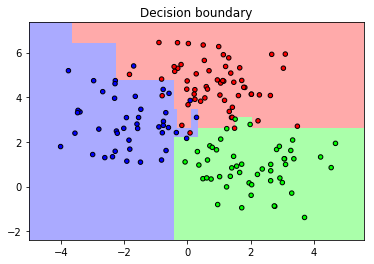

In [31]:
plotDB(bt, X_train, y_train)


## Summary
 - SVM is good for high dimensional cases
 - LinearSVC can include a regularization term L2, or L1
 - KernelSVM can form non-linear decision boundaries
 - Ensemble methods combine several simple predictors to improve the prediction
 - Decision tree is a method to partition the decision space in sections
 - Ensemble methods combine several simple predictors, often simple decision trees
 - Bagging is a strategy for using many paraller predictors and the aggregation of their results
 - Boosting is strategy to implement predictors sequentially so that the successing predictor emphasizes the cases which have been difficult for the previous predictors
 
Cons
  - SVM does not work so well for really big data sizes
  - It has also problems if there is plenty of noise in the data, so that classes are overlapping

## References

```{bibliography} references.bib :filter: docname in docnames :style: unsrt
```